## Monthly sales trends

### Import & Load Data

In [1]:
# Importing libraries
import numpy as np
import pandas as pd

In [2]:
# File path
file_path = "C:/Users/HP/Desktop/My Data Science Journey/Python/Portfolio Project/Why did sales drop/dataset/clothing_sales_jan_jun_2024.xlsx"

# load data from excel
df = pd.read_excel(file_path)

In [4]:
df.head()

,Date,Region,Category,Subcategory,Customer_Type,Units_Sold,Unit_Price,Discount,Sales (USD)
0,2024-01-01,West,Handwear,Gloves,Returning,1,18.95,0.04,18.11
1,2024-01-01,East,Legwear,Trousers,Returning,4,28.57,0.07,106.85
2,2024-01-01,North,Bodywear,Jacket,New,4,99.53,0.06,373.55
3,2024-01-01,South,Handwear,Wristband,New,3,11.12,0.01,32.89
4,2024-01-01,West,Footwear,Boots,Returning,3,115.65,0.04,333.69


In [5]:
# Convert Date to datetime format if not already
df['Date'] = pd.to_datetime(df['Date'])

# Create a 'Month' column for grouping
df['Month'] = df['Date'].dt.to_period('M').astype(str)  # e.g., '2024-01'

# Group by Month and calculate total sales
monthly_sales = df.groupby('Month')['Sales (USD)'].sum().reset_index()

# Display result
monthly_sales

,Month,Sales (USD)
0,2024-01,108759.60
1,2024-02,93694.26
2,2024-03,109170.11
3,2024-04,47469.04
4,2024-05,109501.40
5,2024-06,102643.18


In [8]:
month_map = {
    '2024-01': 'Jan', '2024-02': 'Feb', '2024-03': 'Mar',
    '2024-04': 'Apr', '2024-05': 'May', '2024-06': 'Jun'
}
monthly_sales['Month'] = monthly_sales['Month'].map(month_map)

In [10]:
monthly_sales

,Month,Sales (USD)
0,Jan,108759.60
1,Feb,93694.26
2,Mar,109170.11
3,Apr,47469.04
4,May,109501.40
5,Jun,102643.18


In [6]:
# import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Set visual style
sns.set(style="whitegrid")

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


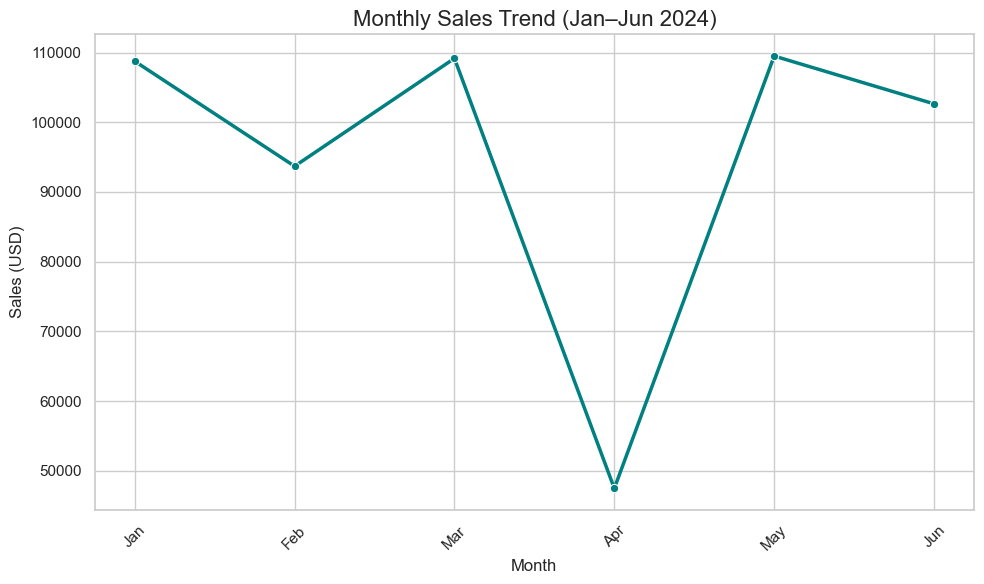

In [11]:
# Set plot style
sns.set(style="whitegrid")

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Sales (USD)', marker='o', linewidth=2.5, color='teal')

# Add titles and labels
plt.title('Monthly Sales Trend (Jan–Jun 2024)', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Sales (USD)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show();

**Here’s what the data reveals about monthly sales performance from January to June 2024:**

In **January** Sales began strong at **108,759.60 dollars**, indicating a solid start to the year possibly fueled by post-holiday shopping or promotions. But there was a noticeable drop to **93,694.26 dollars** in **February:**, which could reflect a typical mid-quarter dip.

In **March** Sales bounced back impressively to **109,170.11 dollars**, surpassing even January sales. But a significant dip occurred with sales dropping sharply to **47,469.04 dollars** in **April**, less than half of March's total. Sales recovered strongly to **109,501.40 dollars** in **May**, the highest monthly figure in the period.

In **June** Sales slightly dipped to **102,643.18 dollars**, still a healthy figure relative to earlier months.

My Observation:

April is a clear outlier with the lowest sales. I'll investigate what led to it having the lowest sales.


In [14]:
# Group by Month, sum Units_Sold, count transactions
monthly_summary = df.groupby('Month').agg({
    'Units_Sold': 'sum',
    'Sales (USD)': 'sum',
    'Discount': 'mean',
    'Date': 'count'  # Number of transactions
}).rename(columns={'Date': 'Transactions', 'Discount': 'Avg_Discount'}).reset_index()

monthly_summary


,Month,Units_Sold,Sales (USD),Avg_Discount,Transactions
0,2024-01,3016,108759.60,0.049650,1201
1,2024-02,2775,93694.26,0.099867,1127
2,2024-03,3031,109170.11,0.049399,1231
3,2024-04,1659,47469.04,0.201069,655
4,2024-05,3070,109501.40,0.050383,1200
5,2024-06,3074,102643.18,0.099352,1234


The big drop in sales was primarily due to fewer units sold and fewer transactions — fewer people bought items in April.

Despite higher discounts offered in April (20%), sales still dropped significantly.

This implies that discounts alone did not drive purchases — possibly external factors (seasonality, stock issues, market conditions) contributed.

The business had less customer activity overall that month, as seen in transaction count.

I'll filter the dataset to April only, group by Customer_Type, Category, and Region separately.

For each group i'll also calculate:

1. Total Units Sold
2. Total Sales (USD)
3. Average Discount

This way, I’ll clearly see which customer segment, product category, or region had the biggest drop or contributed least to sales in April.

In [21]:
# Filter to April data
april_data = df[df['Month'] == '2024-04']

In [23]:
# Group by Customer_Type
april_by_customer = april_data.groupby('Customer_Type').agg({
    'Units_Sold': 'sum',
    'Sales (USD)': 'sum',
    'Discount': 'mean'
}).reset_index()

april_by_customer 

,Customer_Type,Units_Sold,Sales (USD),Discount
0,New,498,13998.33,0.208848
1,Returning,1161,33470.71,0.197866


In [24]:
# Group by Category
april_by_Category = april_data.groupby('Category').agg({
    'Units_Sold': 'sum',
    'Sales (USD)': 'sum',
    'Discount': 'mean'
}).reset_index()

april_by_Category

,Category,Units_Sold,Sales (USD),Discount
0,Bodywear,307,10085.63,0.199496
1,Footwear,331,19616.50,0.200155
2,Handwear,377,4197.56,0.202877
3,Headwear,348,4431.89,0.202889
4,Legwear,296,9137.46,0.199444


In [25]:
# Group by Region
april_by_Region = april_data.groupby('Region').agg({
    'Units_Sold': 'sum',
    'Sales (USD)': 'sum',
    'Discount': 'mean'
}).reset_index()

april_by_Region

,Region,Units_Sold,Sales (USD),Discount
0,East,417,11626.43,0.199697
1,North,449,12900.98,0.205000
2,South,435,12162.72,0.206280
3,West,358,10778.91,0.192095
